<a href="https://colab.research.google.com/github/sbbzplt/QBronze-Colab/blob/master/quantum-with-qiskit/Q88_Grovers_Search_One_Qubit_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://qworld.net" target="_blank" align="left"><img src="https://github.com/sbbzplt/QBronze-Colab/blob/master/qworld/images/header.jpg?raw=1"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b> Grover's Search: One Qubit Representation </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>
[<img src="https://github.com/sbbzplt/QBronze-Colab/blob/master/qworld/images/watch_lecture.jpg?raw=1" align="left">](https://youtu.be/VwzshIQsDBA)
<br><br><br>

##  

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

path_files = "./" if in_colab() else "../qworld/include/"

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1edMlqKILd74c4nhir3Zxvcgb2cvcIgwI?usp=sharing#scrollTo=YE4ARGa98JnH' if in_colab() else 'QB23_Q32_Visualization_of_a_Qubit_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1edMlqKILd74c4nhir3Zxvcgb2cvcIgwI?usp=sharing#scrollTo=mjULpELk8JnJ' if in_colab() else 'QB23_Q32_Visualization_of_a_Qubit_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1edMlqKILd74c4nhir3Zxvcgb2cvcIgwI?usp=sharing#scrollTo=tjDi4YCh8JnK' if in_colab() else 'QB23_Q32_Visualization_of_a_Qubit_Solutions.ipynb#task3')))

if in_colab():
    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py"
    !wget --no-cache -O quantum.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py"
    !wget --no-cache -O drawing.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum_state.py"
    !wget --no-cache -O quantum_state.py {url}

    url = "https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/grover.py"
    !wget --no-cache -O grover.py {url}

--2023-12-21 12:17:31--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/quantum.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2760 (2.7K) [text/plain]
Saving to: ‘quantum.py’

quantum.py          100%[===================>]   2.70K  --.-KB/s    in 0s      

2023-12-21 12:17:32 (25.4 MB/s) - ‘quantum.py’ saved [2760/2760]

--2023-12-21 12:17:32--  https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/include/drawing.py
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6260 (6.1K) [text/plain]
Saving to: ‘drawing.py’

drawing.py          100%[===================>]   6.11K  --.-KB/s    in 0s      

2023-12-21 12:17:32 (52.3 MB/s) - 

#   


The execution of Grover's search algorithm can be simulated on the unit circle.

Throughout the computation, the amplitudes of the marked (or unmarked) elements never differ from each other. Therefore, we can group the elements as marked and unmarked elements.

As the length of the list is 1, we can represent the list as an unit vector on the unit circle where the vertical line ($y$-axis) represents the marked elements and horizontal line ($x$-axis) represents the unmarked elements.

We draw an example unit circle by using python below.

<Figure size 640x480 with 0 Axes>

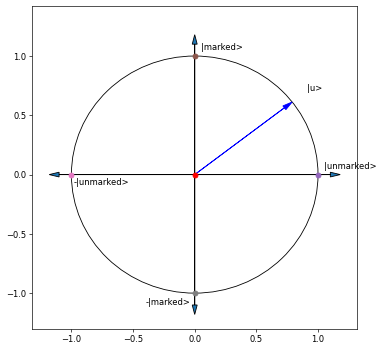

In [11]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

draw_qubit_grover()
draw_quantum_state((5/8)**0.5,(3/8)**0.5,"|u>")
show_plt()

### Example: N = 8 with 3 marked elements

Suppose that the 3rd, 4th, and 7th elements are marked. We can use three qubits and we can associate each element with one of basis states:

$$ \myarray{|c|c|}{
\hline element & state \\ \hline
1st & \ket{000} \\ \hline
2nd & \ket{001} \\ \hline
\mathbf{3rd} & \mathbf{\ket{010}} \\ \hline
\mathbf{4th} & \mathbf{\ket{011}} \\ \hline
5th & \ket{100} \\ \hline
6th & \ket{101} \\ \hline
\mathbf{7th} & \mathbf{\ket{110}} \\ \hline
8th & \ket{111} \\ \hline
} $$

Grover's search algorithm starts in the following quantum state:

$$ \ket{u} =  H\ket{0} \otimes H \ket{0} \otimes H \ket{0} = H^{\otimes 3} \ket{000} $$

$$ \ket{u} =  \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } \otimes
    \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } \otimes
    \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}  } $$

$$ \ket{u} = \frac{1}{2\sqrt{2}} \ket{000} +  \frac{1}{2\sqrt{2}} \ket{001} +  \frac{1}{2\sqrt{2}} \ket{010} +  \frac{1}{2\sqrt{2}} \ket{011} +  \frac{1}{2\sqrt{2}} \ket{100} +  \frac{1}{2\sqrt{2}} \ket{101} +  \frac{1}{2\sqrt{2}} \ket{110} +  \frac{1}{2\sqrt{2}} \ket{111}.  $$

We group them as unmarked and marked elements:

$$ \ket{u} =
    \underbrace{ \frac{1}{2\sqrt{2}} \big( \ket{000} + \ket{001} + \ket{100} + \ket{101} + \ket{111} \big) }_{\ket{u_{x}}}  +
    \underbrace{ \frac{1}{2\sqrt{2}}  \big(\mathbf{  \ket{010} + \ket{011} + \ket{110} } \big) }_{\ket{u_{y}}}
$$

or as vectors

$$ \ket{u} = \ket{u_{x}} + \ket{u_{y}} =
     \frac{1}{2\sqrt{2}} \myvector{1 \\ 1 \\ 0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 1}
    + \frac{1}{2\sqrt{2}}  \myvector{0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0 \\ 1 \\ 0}   
$$

How can we represent this state on the unit circle?

#### Orthogonality of $ \ket{u_{x}} $ and $ \ket{u_{y}} $

It is clear that the quantum states $ \ket{u_{x}} $ and $ \ket{u_{y}} $ are orthogonal to each other, i.e., the pairwise multiplication of entries result in zero and so their summation is also zero: $ \ket{u_{unmarked}} \perp \ket{u_{marked}} $.

On the unit circle, the state $ \ket{0} $ and $ \ket{1} $ are orthogonal to each other, and so, we can represent (map) $ \ket{u} = \ket{u_{x}} + \ket{u_{y}} $ on the unit circle as

$$ \ket{u} \rightarrow \alpha \ket{0} + \beta \ket{1} $$

or by re-naming the basis states

$$ \ket{u} \rightarrow \alpha \ket{unmarked} + \beta \ket{marked}. $$

#### How can we determine the amplitudes of the states $ \ket{0} $ and $ \ket{1} $ based on the amplitudes of the marked and unmarked elements?

We can rewrite $ \ket{u} $ as follows:

$$ \ket{u} = \ket{u_{x}} + \ket{u_{y}} = \frac{\sqrt{5}}{2\sqrt{2}} \myvector{\frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ \frac{1}{\sqrt{5}} } + \frac{\sqrt{3}}{2\sqrt{2}}  \myvector{0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ \frac{1}{\sqrt{3}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ 0}
= \frac{\sqrt{5}}{2\sqrt{2}} \ket{unmarked} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{marked},
$$

where both $ \ket{unmarked} $ and $ \ket{marked} $ are unit vectors and orthogonal to each other.

Thus, we can represent $ \ket{u} $ on the unit circle by the following conversion:

$$
    \ket{u} = \frac{\sqrt{5}}{2\sqrt{2}} \ket{unmarked} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{marked} \xrightarrow{~~~~\mbox{unit circle}~~~~}
    \frac{\sqrt{5}}{2\sqrt{2}} \ket{0} + \frac{\sqrt{3}}{2\sqrt{2}} \ket{1}.
$$

We draw the obtained unit circle by using python below.

<Figure size 640x480 with 0 Axes>

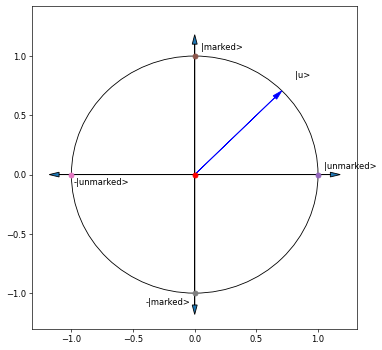

In [12]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

draw_qubit_grover()
draw_quantum_state((5/8)**0.5,(3/8)**0.5,"|u>")
show_plt()

#### The amplitudes of $ \ket{marked} $ and $ \ket{unmarked} $ during the computation

Remark that, after each phase of Grover's algorithm, the entries of $ \ket{marked} $ and $ \ket{unmarked} $ do not change (see also below).

Any quantum state during the computation of Grover's algorithm can be represented, for some $ a,b $, as

$$ \ket{u_j} = \ket{u_{j,x}} + \ket{u_{j,y}} = \myvector{ a \\ a  \\ 0 \\ 0 \\ a \\ a  \\ 0 \\ a } +  \myvector{0 \\ 0 \\b \\ b  \\ 0 \\ 0 \\ b  \\ 0} =
a \sqrt{5} \myvector{\frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{5}} \\ \frac{1}{\sqrt{5}}  \\ 0 \\ \frac{1}{\sqrt{5}} } + b \sqrt{3} \myvector{0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ \frac{1}{\sqrt{3}}  \\ 0 \\ 0 \\ \frac{1}{\sqrt{3}}  \\ 0} = a\sqrt{5} ~ \ket{unmarked} + b\sqrt{3} ~ \ket{marked}.
$$

As a generic rule:

For $ N $ elements with $ k $ marked ones, if the amplitudes of an unmarked and a marked elements are $ a $ and $ b $, respectively, then the quantum state can be represented as

$$ a\sqrt{N-k} ~ \ket{unmarked} + b \sqrt{k} ~ \ket{marked}. $$

## Visualization of Grover's Search algorithm

In this section, we execute Grover's search algorithm by using the modified game explained in notebook [Inversion About the Mean](B80_Inversion_About_the_Mean.ipynb).

You may use your functions *oracle* and *inversion* in [Task 2](B80_Inversion_About_the_Mean.ipynb#task2) in the same notebook.

*For simplicity, we assume that the first element is always marked and the last element is always unmarked.*

<h3> Task 1 </h3>

Execute Grover's search algorithm for 5 steps where $ N = 16 $ and the first element is marked.

Draw all quantum states on the unit circle during the execution.

Print the angle of each state in degree (use $\sin^{-1}$), and check whether there is any pattern for the oracle and inversion operators?

Is there any pattern for each step of Grover's algorithm?

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 5
N = 16
marked_elements = [0]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# your code is here
#

# %run qlatvia.py
# draw_qubit_grover()
# draw_quantum_state(x,y,name)

<a href="Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task1">click for our solution</a>

<h3> Task 2 </h3>

In Task 1, after which step the probability of observing a marked element is the highest?

<a href="Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task2">click for our solution</a>

<h3> Task 3 </h3>

We have a list of size $ N = 128 $. We iterate Grover's search algorithm 10 steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 10
N = 128
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# your code is here
#

# %run qlatvia.py
# draw_qubit_grover()
# draw_quantum_state(x,y,name)

<a href="Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task3">click for our solution</a>

<h3> Task 4 </h3>

We have a list of size $ N = 256 $. We iterate Grover's search algorithm 20 (or 10) steps.

Visually determine (i.e., Tasks 1 & 2) the good number of iterations if the number of marked elements is 1, 2, 4, or 8. (The quantum state on the unit circle should be close to the $y$-axis.)

In [ ]:
def query(elements=[1],marked_elements=[0]):
    for i in marked_elements:
        elements[i] = -1 * elements[i]
    return elements

def inversion (elements=[1]):
    # summation of all values
    summation = 0
    for i in range(len(elements)):
        summation += elements[i]

    # mean of all values
    mean = summation / len(elements)

    # reflection over mean
    for i in range(len(elements)):
        value = elements[i]
        new_value = mean - (elements[i]-mean)
        elements[i] = new_value
    return elements

In [ ]:
from math import asin, pi

# initial values
iteration = 20
N = 256
marked_elements = [0]
#marked_elements = [0,1]
#marked_elements = [0,1,2,3]
#marked_elements = [0,1,2,3,4,5,6,7]
k = len(marked_elements)
elements = []
states_on_unit_circle= []

# initial quantum state
for i in range(N):
    elements.append(1/N**0.5)

#
# your code is here
#

# %run qlatvia.py
# draw_qubit_grover()
# draw_quantum_state(x,y,name)

<a href="Q88_Grovers_Search_One_Qubit_Representation_Solutions.ipynb#task4">click for our solution</a>

## More on Grover's search algorithm

The idea behind Grover's search algorithm is that
<ul>
    <li> the amplitudes of the marked (less frequent) elements can be quickly amplified, </li>
    <li> and so the probability of observing one of the marked elements quickly approches to 1.</li>
</ul>

For "quick" amplification, we iteratively apply two reflections to our quantum states.

The first reflection is a clockwise rotation, and the second reflection is a counterclockwise rotation.

The second reflection always rotates $ 2 \theta $ degree more than the first reflection, where the $ \theta $ is the angle of this initial state on the unit circle.

Therefore, the quantum state is rotated by $ 2 \theta $ in counter-clockwise direction after two reflections.

### Example Reflections

We closely look at the initial part of Task 1 by explictly drawing the reflection lines.

Suppose that we have 16 elements and one of them is marked.

**Below we draw the first reflection line with green color and the second reflection line with yellow color.**

<Figure size 640x480 with 0 Axes>

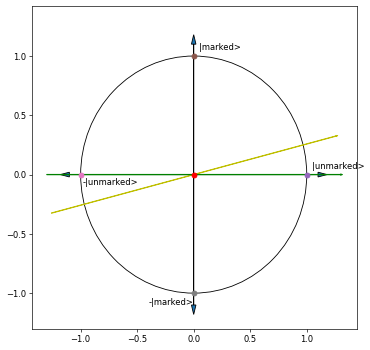

In [5]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
show_plt()

**After the Hadamard operators, we start with the following state.**

<Figure size 640x480 with 0 Axes>

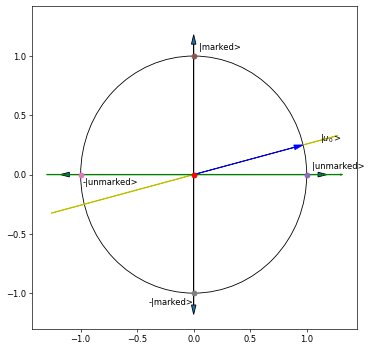

In [6]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,(1/16)**0.5,"$|u_0>$")
show_plt()

**Iteration 1, after the first reflection:**

<Figure size 640x480 with 0 Axes>

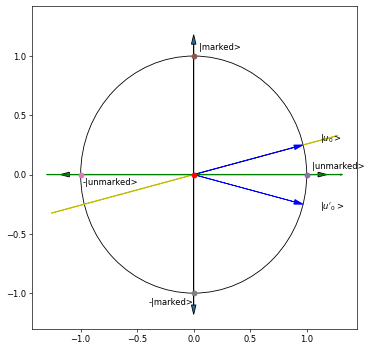

In [7]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,(1/16)**0.5,"$|u_0>$")
draw_quantum_state((15/16)**0.5,-(1/16)**0.5,"$|u'_0>$")
show_plt()

**Iteration 1, after the second reflection:**

<Figure size 640x480 with 0 Axes>

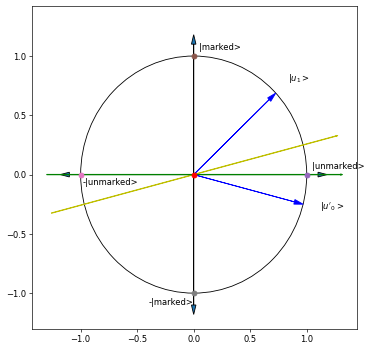

In [8]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state((15/16)**0.5,-(1/16)**0.5,"$|u'_0>$")
draw_quantum_state(0.7262,0.6875,"$|u_1>$")
show_plt()

**Iteration 2, after the first reflection:**

<Figure size 640x480 with 0 Axes>

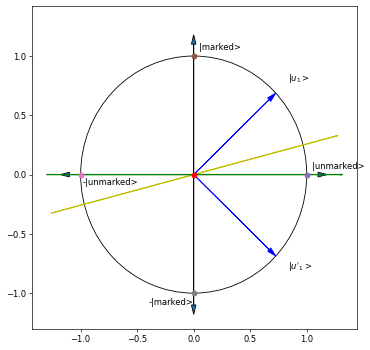

In [9]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state(0.7262,0.6875,"$|u_1>$")
draw_quantum_state(0.7262,-0.6875,"$|u'_1>$")
show_plt()

**Iteration 2, after the second reflection:**

<Figure size 640x480 with 0 Axes>

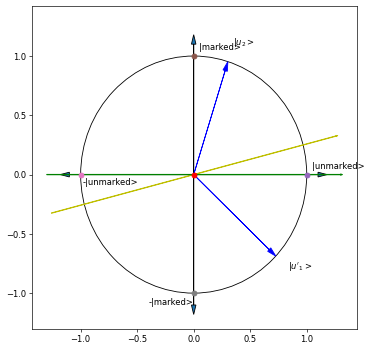

In [10]:
quantum_file = path_files+"quantum.py"
%run $quantum_file

import matplotlib.pyplot as plt
draw_qubit_grover()
plt.arrow(-1.2587,-0.325,2*1.2587,0.65,color="y",width=0.004)
plt.arrow(-1.3,0,2.6,0,color="g",width=0.004)
draw_quantum_state(0.7262,-0.6875,"$|u'_1>$")
draw_quantum_state(0.3026,0.9531,"$|u_2>$")
show_plt()

### When to Stop

When iterating Grover's search algorithm, we should be careful when to stop.
<ul>
    <li> Because, after hitting a maximum value, these amplitudes start to quickly decrease, and after hitting a minimum value, they are amplified again, and so on.</li>
</ul>

As a trivial example, we consider the rotation on the unit circle with angle $ \frac{\pi}{8} $ that starts in $ \ket{0} $.
<ul>
    <li> After every 4 rotations, we visit states $ \ket{1} $, $ -\ket{0} $, $ -\ket{1} $, again $ \ket{0} $, and so on. </li>
    <li> Remark that the probability of observing the state $ \ket{1} $ oscillates between 0 and 1 while rotating. </li>
</ul>

<h3> The number of iterations </h3>

If there is a single marked element in a list of size $ N $, then $ \pi \dfrac{\sqrt{N}}{4} $ iterations can give the marked element with high probability.

If there are $k$ marked elements, then it is better to iterate $ \pi \dfrac{\sqrt{\frac{N}{k}}}{4} $ times.

If $k$ is unknown, then we can execute the algorithm with different iterations. One way of doing this is to iterate the algorithm  
<br>
$ \pi \dfrac{\sqrt{\frac{N}{1}}}{4}, \pi \dfrac{\sqrt{\frac{N}{2}}}{4}, \pi \dfrac{\sqrt{\frac{N}{4}}}{4}, \pi \dfrac{\sqrt{\frac{N}{8}}}{4}, \ldots $ times.

The total number of iterations will still be proportional to $ \pi \dfrac{\sqrt{N}}{4} $: $ O \Big( \pi \dfrac{\sqrt{N}}{4} \Big) $.


### Mathematical derivation of the reflection by inversion (optional)

_(You will see a similar but alternative derivation in the next notebook.)_

It is clear that query operators reflect the quantum state on the unit circle over $ x $-axis.

On the other hand, the inversion operator reflects the quantum state on the unit circle over the line defined by the initial state, say $ \ket{u} $. This fact is not so obvious and we present here how to derive it. ($ \bra{u} $ is the conjugate transpose of the vector $ \ket{u} $.)

The initial quantum state is $ \ket{u} = \myvector{\frac{1}{\sqrt{N}} \\ \vdots \\ \frac{1}{\sqrt{N}}}$ and the inversion is a linear operator and represented by the matrix:

$$ D = 2 \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\
    }
- I . $$

Since $ \ket{u} \bra{u} = \mymatrix{ccc}{
    \frac{1}{N}  & \cdots & \frac{1}{N} \\
    \vdots & \ddots & \vdots \\
    \frac{1}{N}  & \cdots & \frac{1}{N} \\
    } $, we can represent $ D $ in terms of $ \ket{u} $ as $ D = 2 \ket{u} \bra{u} - I$.
    
Let our current quantum state be $a \ket{u} + b \ket{u^\perp}$, where $\ket{u^\perp}$ denotes the state, which is orthogonal (perpendicular) to $\ket{u}$. After applying $D$ to our current quantum state, we obtain

$$D \big(a \ket{u} + b \ket{u^\perp}\big) = \big(2 \ket{u} \bra{u} - I \big) \big(a \ket{u} + b \ket{u^\perp} \big) = a \big(2 \ket{u} \bra{u} \ket{u} - \ket{u} \big) + b \big(2 \ket{u} \bra{u} \ket{u^\perp} - \ket{u^\perp} \big). $$

To simplify this equation, we use the following two facts:
<ul>
    <li>$\bra{u} \ket{u} = 1$, because the inner product of a quantum state gives its length square, which is equal to 1;</li>
    <li>$\bra{u} \ket{u^\perp} = 0$, because the states are orthogonal to each other.</li>
</ul>

$$ a \big( 2 \ket{u} \bra{u} \ket{u} - \ket{u} \big) + b \big( 2 \ket{u} \bra{u} \ket{u^\perp} - \ket{u^\perp} \big) = a \big( 2 \ket{u} - \ket{u} \big) + b \big( 2 \ket{u} \cdot 0 - \ket{u^\perp} \big) = a \ket{u} - b \ket{u^\perp}. $$

As $D (a \ket{u} + b \ket{u^\perp}) = a \ket{u} - b \ket{u^\perp}$, we conclude that $D$ is a reflection over axis formed by the state $\ket{u}$.